In [1]:
!pip install PyWavelets==1.7.0
!pip install opencv-python==4.8.0.76
!pip install seaborn==0.13.2
   


In [2]:
import cv2
import matplotlib.pyplot as plt
import numpy as np

In [3]:
img=cv2.imread("codebasics py master DataScience-CelebrityFaceRecognition_model_dataset/lionel_messi/_111066400_messi.jpg")

In [4]:
img.shape

(576, 1024, 3)

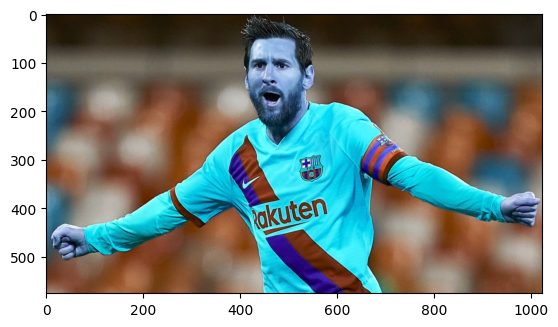

In [5]:
plt.imshow(img)

In [6]:
gray_image = cv2.cvtColor(img, cv2.COLOR_BGR2GRAY)
gray_image

array([[ 18,  18,  18, ...,  33,  33,  33],
       [ 18,  18,  18, ...,  32,  32,  32],
       [ 19,  19,  18, ...,  31,  31,  32],
       ...,
       [130, 132, 132, ...,  78,  78,  78],
       [129, 131, 133, ...,  79,  78,  78],
       [131, 133, 136, ...,  79,  78,  78]], dtype=uint8)

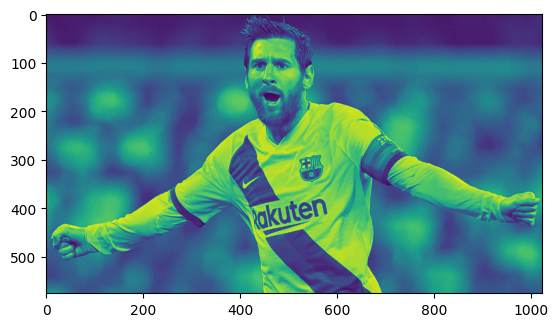

In [7]:
plt.imshow(gray_image)

In [8]:
face=cv2.CascadeClassifier('haarcascades/haarcascade_frontalface_default.xml')

In [9]:
eye=cv2.CascadeClassifier('haarcascades/haarcascade_eye.xml')

In [10]:
faces=face.detectMultiScale(gray_image,1.3,5)
faces

array([[394,  54, 138, 138]], dtype=int32)

In [11]:
#u can see that faces is a 2d array 
#so let us try to extract only the face region
(x,y,w,h)=faces[0]
x,y,w,h

(394, 54, 138, 138)

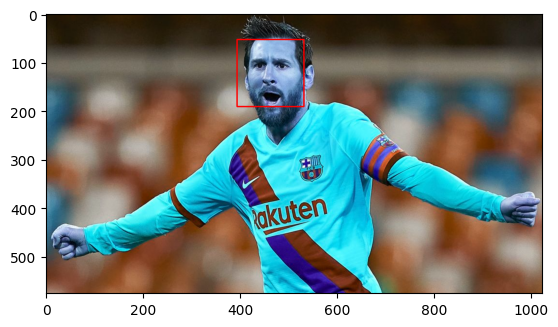

In [12]:

#we use the face api to detect the point at which the face starts and using faces 
#2 d array we get the values of x,y,w,h.Then we use these values to draw a rectangle
#containing the face
# Draw rectangle
face_img = cv2.rectangle(img, (x, y), (x + w, y + h), (255, 0, 0), 2)

# Display image
plt.imshow(face_img)

plt.show()


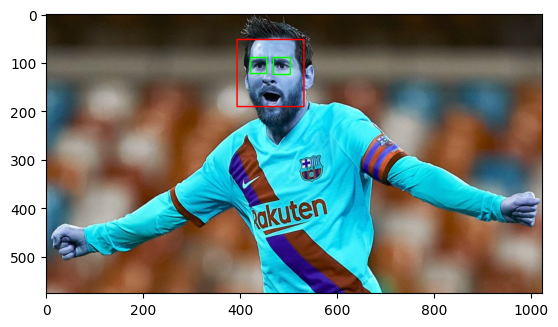

In [13]:
cv2.destroyAllWindows()
for (x,y,w,h) in faces:
    face_img = cv2.rectangle(img,(x,y),(x+w,y+h),(255,0,0),2)
    roi_gray = gray_image[y:y+h, x:x+w]
    roi_color = face_img[y:y+h, x:x+w]
    eyes = eye.detectMultiScale(roi_gray)
    for (ex,ey,ew,eh) in eyes:
        cv2.rectangle(roi_color,(ex,ey),(ex+ew,ey+eh),(0,255,0),2)
        

plt.figure()
plt.imshow(face_img, cmap='gray')
plt.show()

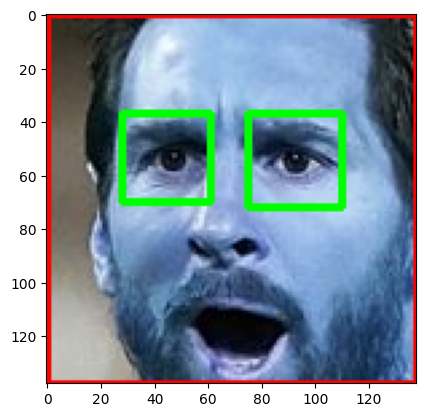

In [14]:
plt.imshow(roi_color)

In [15]:
def get_cropped_image_if_2_eyes(image_path):
    img = cv2.imread(image_path)
    gray = cv2.cvtColor(img, cv2.COLOR_BGR2GRAY)
    faces = face.detectMultiScale(gray, 1.3, 5)
    for (x,y,w,h) in faces:
        roi_gray = gray[y:y+h, x:x+w]
        roi_color = img[y:y+h, x:x+w]
        eyes = eye.detectMultiScale(roi_gray)
        if len(eyes) >= 2:
            return roi_color

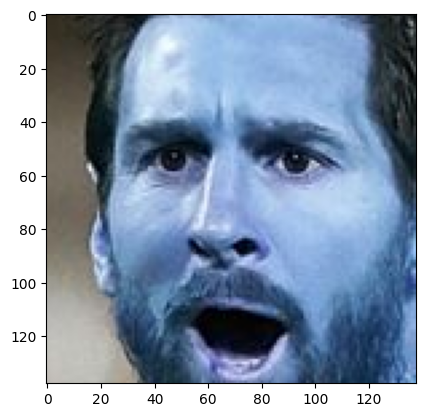

In [16]:
image=get_cropped_image_if_2_eyes('codebasics py master DataScience-CelebrityFaceRecognition_model_dataset/lionel_messi/_111066400_messi.jpg')
plt.imshow(image)

In [17]:
path_to_data='./codebasics py master DataScience-CelebrityFaceRecognition_model_dataset/'
path_to_cropped_data='./codebasics py master DataScience-CelebrityFaceRecognition_model_dataset/cropped/'

In [18]:
#will append only the name of the file
import os
img_dirs=[]
for i in os.scandir(path_to_data):
    if i.is_dir():
        img_dirs.append(i)
img_dirs

[<DirEntry 'maria_sharapova'>,
 <DirEntry 'virat_kohli'>,
 <DirEntry 'lionel_messi'>,
 <DirEntry '.ipynb_checkpoints'>]

In [19]:
#will append the entire directory
import os

 # Make sure to set this to your actual directory path
img_dirs = []

for entry in os.scandir(path_to_data):
    if entry.is_dir():
        img_dirs.append(entry.path)  # Use entry.path to get the full path of the directory

# Print all subdirectories
for dir in img_dirs:
    print(dir)


./codebasics py master DataScience-CelebrityFaceRecognition_model_dataset/maria_sharapova
./codebasics py master DataScience-CelebrityFaceRecognition_model_dataset/virat_kohli
./codebasics py master DataScience-CelebrityFaceRecognition_model_dataset/lionel_messi
./codebasics py master DataScience-CelebrityFaceRecognition_model_dataset/.ipynb_checkpoints


In [20]:
import shutil
if os.path.exists(path_to_cropped_data):
    shutil.rmtree(path_to_cropped_data)
os.mkdir(path_to_cropped_data)

In [22]:


cropped_img_dir = []
celebrity_dict = {}
count=1
for j in img_dirs:
    if j!= './codebasics py master DataScience-CelebrityFaceRecognition_model_dataset/cropped':
        celebrity_name = os.path.basename(j)
        print(celebrity_name)
        for entry in os.scandir(j):
            roi_color = get_cropped_image_if_2_eyes(entry.path)
            if roi_color is not None:
                cropped_folder = os.path.join(path_to_cropped_data, celebrity_name)
                if not os.path.exists(cropped_folder):
                    os.mkdir(cropped_folder)
                    cropped_img_dir.append(cropped_folder)
                    print("Generating cropped images in folder: ", cropped_folder)
                cropped_file_name=celebrity_name+str(count)+".jpg"
                cropped_file_path=cropped_folder+"/"+cropped_file_name
                cv2.imwrite(cropped_file_path,roi_color)
                count+=1

maria_sharapova
virat_kohli
lionel_messi


error: OpenCV(4.8.0) /Users/xperience/GHA-OpenCV-Python/_work/opencv-python/opencv-python/opencv/modules/imgproc/src/color.cpp:182: error: (-215:Assertion failed) !_src.empty() in function 'cvtColor'
